In [1]:
# required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# read data
data = open('songs.txt').read()
corpus = data.lower().split("\n")
print('Length of the corpus: ', len(corpus))
print('First 5 lines: ', ' '.join(corpus[:5]))

Length of the corpus:  1014
First 5 lines:  yeah so i guess this is what it is, huh? think it's obvious we ain't never gonna seeâ€…eyeâ€…to eye but it'sâ€…funny


In [3]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)

In [4]:
total_words = len(tokenizer.word_index)+1
print(total_words)

2228


In [5]:
sequences = []

for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[: i+1]
        sequences.append(n_gram_sequence)

max_length = max([len(x) for x in sequences])
sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen = max_length, padding='pre'))

labels = sequences[:, -1]
xs = sequences[:, :-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
embedding_dim = 100
lstm_units = 120
learning_rate = 0.001

In [7]:
model = tf.keras.Sequential([
          tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_length-1),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units)),\
          tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           222800    
                                                                 
 bidirectional (Bidirectiona  (None, 240)              212160    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2228)              536948    
                                                                 
Total params: 971,908
Trainable params: 971,908
Non-trainable params: 0
_________________________________________________________________


In [9]:
epochs = 50
history = model.fit(xs, ys, epochs=epochs)

Epoch 1/50
253/253 [==============================] - 11s 31ms/step - loss: 6.7378 - accuracy: 0.0380
Epoch 2/50
253/253 [==============================] - 8s 32ms/step - loss: 6.2059 - accuracy: 0.0423
Epoch 3/50
253/253 [==============================] - 8s 33ms/step - loss: 5.9457 - accuracy: 0.0510
Epoch 4/50
253/253 [==============================] - 8s 33ms/step - loss: 5.6098 - accuracy: 0.0674
Epoch 5/50
253/253 [==============================] - 8s 33ms/step - loss: 5.2573 - accuracy: 0.0964
Epoch 6/50
253/253 [==============================] - 8s 33ms/step - loss: 4.9119 - accuracy: 0.1236
Epoch 7/50
253/253 [==============================] - 9s 34ms/step - loss: 4.5858 - accuracy: 0.1572
Epoch 8/50
253/253 [==============================] - 9s 35ms/step - loss: 4.2765 - accuracy: 0.1888
Epoch 9/50
253/253 [==============================] - 9s 34ms/step - loss: 3.9775 - accuracy: 0.2215
Epoch 10/50
253/253 [==============================] - 9s 34ms/step - loss: 3.6915 - accur

In [10]:
def prediction(seed_text, next_words):
    for _ in range(next_words):

        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_length-1, padding='pre')
        probabilities = model.predict(token_list)
        predicted = np.argmax(probabilities, axis=-1)[0]

        if predicted != 0:
            output_word = tokenizer.index_word[predicted]
            seed_text += " " + output_word
            
    print(seed_text)


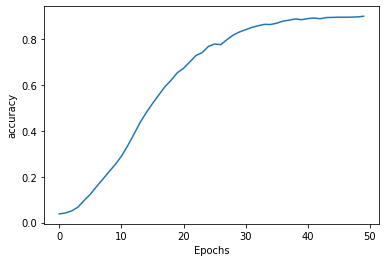

In [11]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [12]:
seed_text = "I am "
next_words = 100
prediction(seed_text, next_words)

I am  the complete opposite of these retards who spit these weak bars i'ma leave carnage carnage in some fe texas take of that's funny bro we been movin' slowly look are tryna rolling wiling dirt look at how we have ain't sold your last out i said chill of officers officers it white flags regrets and i ain't never back up all i hate that i hate it and i had a messed up head like a tranq full of tylenol fe texas officers take it and lock it and lock it lock it lock it i boy i had waiting
